https://programmerclick.com/article/13461138023/
https://pybonacci.org/2012/09/29/transformada-de-fourier-discreta-en-python-con-scipy/
https://relopezbriega.github.io/blog/2016/01/27/ecuaciones-en-derivadas-parciales-con-python/
[7:31 p. m., 11/1/2022] Abel Alvarez: https://ichi.pro/es/cree-su-propia-simulacion-de-fluidos-de-volumen-finito-con-python-157911637263109
[7:32 p. m., 11/1/2022] Abel Alvarez: https://www.openfoam.com/documentation/tutorial-guide
[7:32 p. m., 11/1/2022] Abel Alvarez: https://www.youtube.com/watch?v=KznljrgWSvo
[7:33 p. m., 11/1/2022] Abel Alvarez: https://www.featool.com/tutorial/2017/06/16/python-multiphysics-and-fea-simulations-with-fenics-and-featool
[7:39 p. m., 11/1/2022] Abel Alvarez: https://www.ctcms.nist.gov/fipy/



# Series  de Fourier

# Transformada de Fourier

# Transformada de Fourier discreta




$$f(t) = a_0 + \sum_{k=1}^{\infty}[a_k \cos( k \omega_0 t) + b_k \sin(k \omega_0t)]$$
donde 
$$a_k=\frac{2}{T}\int_0^Tf(t)\cos(k \omega_0t)dt$$
$$b_k=\frac{2}{T}\int_0^Tf(t)\sin(k \omega_0t)dt$$

[Video de la transformada de Fourier](https://youtu.be/r18Gi8lSkfM)

Nosotros denotamos una función periódica $f(x)$ continua por partes, este espacio lo podemos denotar como $\overline{C}[-\pi,\pi]$, note que este es un espacio vectorial dotado con el producto interno 

$$\label{eqinter}<f,g>=\int_{-\pi}^{\pi}f(x)\overline{g}(x)dx.$$

Entonces podemos escribir una función de $\overline{C}[-\pi,\pi]$ en términos de de la serie de Fourier, la cual se puede expresar como la suma infinita cosenos y senos de una frecuencia creciente. En particular, si $f(x)$ tiene periodo $2 \pi$, esta se puede escribir como 

$$\label{eqseriepi}f(x)=\frac{a_0}{2}+\sum_{k=1}^{\infty}\Big(a_k\cos(kx)+b_k\sin(kx)\Big),$$
donde 

$$a_k=\frac{1}{\pi}\int_{-\pi}^\pi f(x)\cos(kx)dx,$$

$$b_k=\frac{1}{\pi}\int_{-\pi}^\pi f(x)\sin(kx)dx,$$

esto puede ser visto como la proyección de de la función $f(x)$ en la base ortonormal de funciones de senos y cosenos $\Big\{\cos(kx),\sin(kx)\Big\}_{k=0}^{\infty}$. (Note que la funciones $\cos(kx)$ y $\sin(kx)$ son ortogonales bajo el producto interno \eqref{eqinter}). De esta forma los coeficientes $a_k$ y $b_k$ se pueden expresar como 

$$a_k=\frac{1}{||\cos(kx)||^2<f(x),\cos(kx)>},$$

$$b_k=\frac{1}{||\sin(kx)||^2<f(x),\sin(kx)>},$$

donde $||\cos(kx)||^2=||\sin(kx)||^2=\pi$

Note que una función con T-periodo en $[0,T)$ es similarmente escrita  

$$f(x)=\frac{a_0}{2}+\sum_{k=1}^{\infty}\Big(a_k\cos\Big(\frac{2\pi kx}{T}\Big)+b_k\sin\Big(\frac{2\pi kx}{T}\Big)\Big),$$

con 

$$a_k=\frac{2}{T}\int_{0}^T f(x)\cos\Big(\frac{2\pi kx}{T}\Big)dx,$$

$$b_k=\frac{2}{T}\int_{0}^T f(x)\sin\Big(\frac{2\pi kx}{T}\Big)dx,$$


### Transformada de Fourier en su forma compleja

Nosotros podemos hacer uso de la identidad de Euler 

$$e^{i\theta}=\cos\theta + i\sin\theta,$$
podemos escribir la serie \eqref{eqseriepi} [una serie compleja](http://www.sc.ehu.es/sbweb/fisica3/ondas/fourier/fourier.html) 

$$\sum_{k=-\infty}^\infty c_ke^{ikx}.$$

# Calculo de las series de Fourier usando la sympy

el primer comando que veremos es como usar el calculo de $n$ primeros términos de la serie de Fourier usando la librería simbólica SYMPY. El siguiente código calcula la serie de Fourier para la función periódica $x^2$ con periodo $[-\pi,\pi]$, la cual esta derterminada 

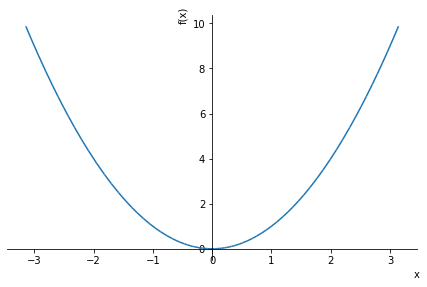

In [2]:
# Gráfica de una funcion en una variable
import sympy as sym
from sympy import pi
sym.init_printing()  # imprimir formato latex


x = sym.symbols('x')
f=x**2
sym.plot(f, (x, -pi, pi))

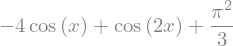

In [3]:
from sympy import fourier_series
s = fourier_series(x**2, (x, -pi, pi))
s.truncate(n=3)  #  determina el número de coeficientes que queremos que nos imprima la serie

## Aproximación de una función mediante la serie de Fourier

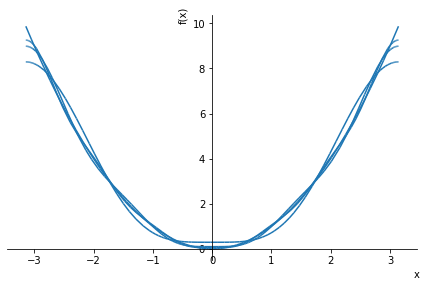

In [4]:
#f = sym.Abs(x)
f =x**2
s = fourier_series(f, (x, -pi, pi))
s1 = s.truncate(n = 3)
s2 = s.truncate(n = 5)
s3 = s.truncate(n = 7)
p = sym.plot(f, s1, s2, s3, (x, -pi, pi), show=True, legend=False)

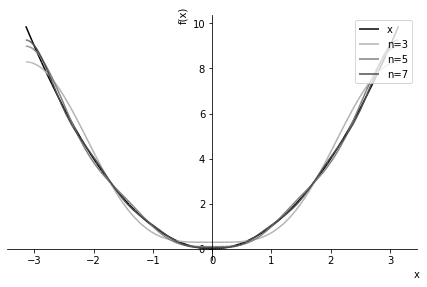

In [5]:
p = sym.plot(f, s1, s2, s3, (x, -pi, pi), show=False, legend=True)
p[0].line_color = (0, 0, 0)
p[0].label = 'x'
p[1].line_color = (0.7, 0.7, 0.7)
p[1].label = 'n=3'
p[2].line_color = (0.5, 0.5, 0.5)
p[2].label = 'n=5'
p[3].line_color = (0.3, 0.3, 0.3)
p[3].label = 'n=7'
p.show()

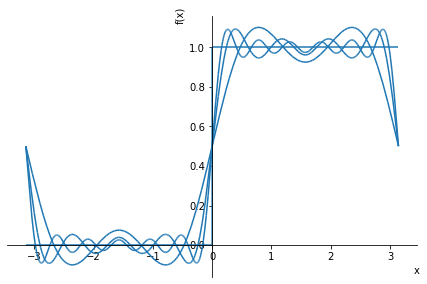

In [6]:
f2 = sym.Piecewise((0, x < 0), (1, x <= pi))
s  = fourier_series(f2, (x, -pi, pi))
s1 = s.truncate(n = 3)
s2 = s.truncate(n = 5)
s3 = s.truncate(n = 7)
p = sym.plot(f2,s1,s2,s3,(x, -pi, pi), show=True, legend=False)

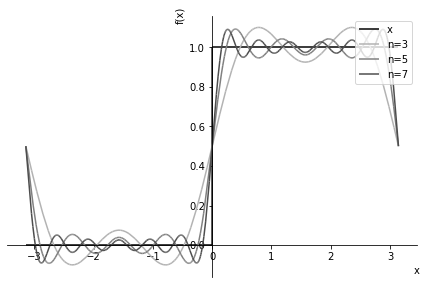

In [7]:
p = sym.plot(f2, s1, s2, s3, (x, -pi, pi), show=False, legend=True)
p[0].line_color = (0, 0, 0)
p[0].label = 'x'
p[1].line_color = (0.7, 0.7, 0.7)
p[1].label = 'n=3'
p[2].line_color = (0.5, 0.5, 0.5)
p[2].label = 'n=5'
p[3].line_color = (0.3, 0.3, 0.3)
p[3].label = 'n=7'
p.show()

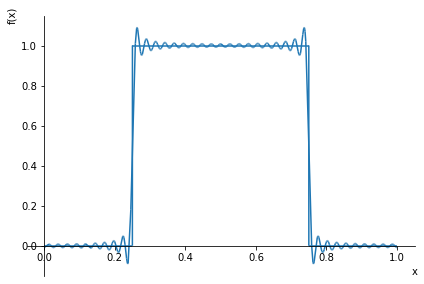

In [8]:
f3 = sym.Piecewise((0, x <= 0.25), (1, x <= 0.75),(0, x < 1.0))

s  = fourier_series(f3, (x, 0, 1))
s2 = s.truncate(n = 20)
p = sym.plot(f3,s2,(x, 0, 1), show=True, legend=False)



# Propiedades de la series de Fourier

* Si $f$ es una función continua a trozos en  $[-L,L]$. Entonces, para cada $x$ in $(-L,L)$, ña serie de Fourier de $f$ en $[-L,L]$ converge a 
$$\frac{1}{2}(f(x+)+f(x-)$$

* Si $f$ es es una función par en $[-L,L]$, esto es que el gráfico en $[-L,0]$ es una reflexión a través del eje vertical del gráfico en $[0,L]$, entonces la serie de Fourier esta en términos de  coseno. En el caso de que $f$ sea impar la serie esta en términos de seno


## [Fenómeno de Gibbs](https://cnx.org/contents/Qji8Bz7t@2.13:oU2_ow_S@1/El-Fen%C3%B3meno-de-Gibbs)

Josiah Williard Gibbs explico el comportamiento de porque cuando una serie de Fourier se aproxima a una función discontinua genera un comportamiento anormal, haciendo que el el punto se generen ciertas ondulaciones no asociadas a la aproximación

Para ilustrar este ejemplo tomemos la función 

$$f(x)=\begin{cases}
-\pi/4 \ \ \ &\text{ si }-\pi\leq x<0,\\
0\ \ \ &\text{ para }x=0,\\
\pi/4 \ \ \ &\text{ si }0\leq x<\pi.
\end{cases}$$
Esta función tiene una discontinuidad en 0, pero la serie de fourier converge en $[-\pi,\pi]$. Note que la serie de Fourier esta determinada por 

$$\sum_{n=1}^\infty\frac{1}{2n-1}\sin((2n-1)x)$$



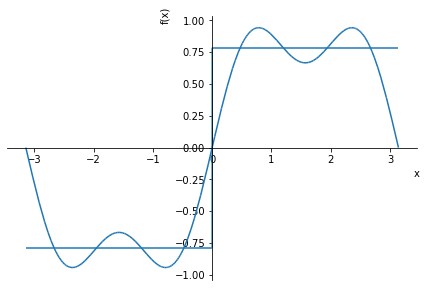

In [9]:
f4 = sym.Piecewise((-pi/4.0, x < 0), (pi/4.0, x <pi))

s  = fourier_series(f4, (x, -pi, pi))
s4 = s.truncate(n = 2)
p = sym.plot(f4,s4,(x, -pi, pi), show=True, legend=False)


muestra las sumas parciales de esta serie, en comparación con la función. Observe que las sumas parciales muestran un pico cerca de 0, el punto de discontinuidad apagado. Dado que las sumas parciales $S_N$ se acercan a la función como $N\to\infty$, podríamos esperar que estos picos se desaparezcan, lo cual no sucede. En cambio, permanecen aproximadamente a la misma altura, pero se acercan al punto $(0,0)$ a medida que $N$ aumenta. Este es el fenómeno de Gibbs.

La aproximación sigma ajusta una suma de Fourier para eliminar el fenómeno de Gibbs que de otro modo ocurriría en discontinuidades. Una suma aproximada sigma para una serie de Fourier de una función periódica T se puede escribir como 

$$s(x)=\frac{1}{2}a_0+\sum_{k=1}^{m-1}sinc\Big(\frac{k}{m}\Big)\Big(a_k\cos\Big(\frac{2\pi kx}{T}\Big)+b_k\sin\Big(\frac{2\pi kx}{T}\Big)\Big)$$

donde $a_i$ y $b_i$ son los coeficientes de Fourier y $sinc\Big(\frac{k}{m}\Big)$ es el [Lanczos $\sigma$ factor](https://mathworld.wolfram.com/LanczosSigmaFactor.html) expresado en términos de la función normalizada $sinc$. 

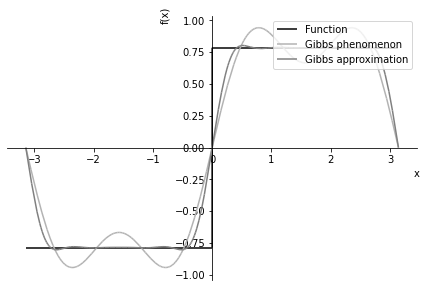

In [10]:
f5=s.sigma_approximation(10)
p = sym.plot(f4,s4,f5,(x, -pi, pi), show=False, legend=True)
p[0].line_color = (0, 0, 0)
p[0].label = 'Function'
p[1].line_color = (0.7, 0.7, 0.7)
p[1].label = 'Gibbs phenomenon'
p[2].line_color = (0.5, 0.5, 0.5)
p[2].label = 'Gibbs approximation'
p.show()

# Diferenciación e integración de las series de Fourier


### Integración
Sea $f$ una función continua por partes en $[-L,L]$, con serie de Fourier
$$f(x)=\frac{a_0}{2}+\sum_{k=1}^{\infty}\Big(a_k\cos\Big(\frac{\pi kx}{L}\Big)+b_k\sin\Big(\frac{\pi kx}{L}\Big)\Big),$$
entonces para cualquier x con $-L\leq x \leq L$ 

$$\int_{-L}^xf(t)dt=\frac{a_0}{2}(x+L)+\frac{L}{\pi}\sum_{k=1}^{\infty}\frac{1}{n}\Big(a_k\sin\Big(\frac{\pi kx}{L}\Big)-b_k\cos\Big(\frac{\pi kx}{L}\Big)-(-1)^n\Big),$$


### Derivación 
Sea $f$ una función continua  en $[-L,L]$, y suponemos que $f(-L)=f(L)$. Sea $f'$ una función continua por partes en $[-L,L]$. Entonce la serie de Fourier de $f$ en $[-L,L]$ converge a $f(x)$ en $[-L,L]$
$$f(x)=\frac{a_0}{2}+\sum_{k=1}^{\infty}\Big(a_k\cos\Big(\frac{\pi kx}{L}\Big)+b_k\sin\Big(\frac{\pi kx}{L}\Big)\Big),$$
Además si $f''$ existe para cada $x\in [-L,L]$, entoncs los términos de la derivada de Fourier convergen a la función derivada


$$f'(x)=\sum_{k=1}^{\infty}\frac{n\pi}{L}\Big(-a_k\sin\Big(\frac{\pi kx}{L}\Big)+b_k\cos\Big(\frac{\pi kx}{L}\Big)\Big),$$


### Teorema de Parseval 

Sea $f$ una función continua en $[-L,L]$ y sea $f'$ una función continua por partes. Suponiendo que $f(-L)=f(L)$. Entonces los coeficientes de Fourier de $f$ en $[-L,L]$ satisfacen 

$$\frac{1}{2}a_0^2+\sum_{n=1}^\infty(a_n^2+b_n^2)=\frac{1}{L}\int_{-L}^Lf(x)^2dx.$$

### Teorema de convergencia 
Sea $f$ una función continua en $[-L,L]$ y sea $f'$ una función continua por partes. Suponiendo que $f(-L)=f(L)$.
Entonces los coeficientes de Fourier de $f$ en $[-L,L]$ converge absolutamente y uniformente a $f(x)$ en $[-L,L]$

# Ejercicios 

1.  Sea $$S_N(x)=\frac{4}{\pi}\sum_{n=1}^N\frac{1-(-1)^n}{n^3}\sin(nx).$$ Construya la gráfica de $S_N$ en $x(\pi-x)$, para $N=2$ hasta $N=10$. Esto podrá interpretarse  en un sentido como la convergencia de la serie de Fourier de $$\frac{4}{\pi}\sum_{n=1}^\infty\frac{1-(-1)^n}{n^3}\sin(nx),$$ en $[0,\pi].$
2. Sea $p(x)$ un polinomio. Probar que no existe un numero $k$ talque $p(x9=k\sin(nx)$ in $[0,\pi]$ parac ualquier entero positivo $n$
 3. Sea $p(x)$ un polinomio. Probar no existe un numero finito $N$, tal que $S_N=\sum_{n=1}^{N}b_n\sin(nx)$ es igual a $p(x)$ para $0\leq x\leq \pi,$ para cualquier elcción de $b_1,b_2,...,b_N$

# Ejercicios
Encuentre la serie de Fourier y dibuje los primeros 10 términos 

1. $f(x)=4$, en $-3\leq x\leq 3$
2. $f(x)=1-|x|$, en $-1\leq x\leq 1$
3. $f(x)\begin{cases}-x& \text{ para }-2\leq x<0\\
1+x^2& \text{ para }0\leq x<2
\end{cases}$
4. $f(x)=\cos(x/2)-\sin(x)$, en $-\pi\leq x\leq \pi$

Determine si la serie converge a la función en el intervalo 

5. $f(x)\begin{cases}2x& \text{ para }-3\leq x<-2\\
0& \text{ para }-2\leq x<1\\
x^2& \text{ para }1\leq x \leq 3
\end{cases}$

6. $f(x)\begin{cases}\cos(x)& \text{ para }-2\leq x<0\\
\sin(x)& \text{ para }0\leq x \leq 2
\end{cases}$

7. $f(x)\begin{cases}-2& \text{ para }-4\leq x \leq-2\\
1+x^2& \text{ para }-2< x\leq 2\\
0& \text{ para }2< x \leq 4
\end{cases}$

# Ejercicios 

1.  Demuestre que si una función es par entonces los coeficientes de la serie de Fourier están en términos de $\cos(x)$.
2.  Demuestre que si una función es impar  entonces los coeficientes de la serie de Fourier están en términos de  $\sin(x)$.

3. Determine todas las funciones en $[-L,L]$ que son ambas para e impar.

4. Sea $f(x)$ definida en $[-L,L]$. Pruebe que $f$ puede escribirse como la suma de función par y una función impar en ese intervalo.


# Ejercicios 

1. Sea $f(x)\begin{cases}0& \text{ para }-\pi\leq x\leq 0\\
x& \text{ para }0<x\leq \pi
\end{cases}$
    * Escriba la serie de Fourier de $f(x)$ en $[-\pi,\pi]$ y muestre que esta serie converge para $f(x)$ en $(-\pi,\pi)$
    * ¿Es posible integrar la serie termino a termino?
    * Obtenga la serie de Fourier de $\int_{\pi}^\pi f(t)dt$ en $(-\pi,\pi)$
    
2. Sea $f(x)=|x|$ para $-1\leq x\leq 1$
    * Escriba la serie de Fourier de $f(x)$ en $[-1,1]$ 
    * Muestre que la serie es diferenciable termino a termino de la expasión de Fourier de $f'(x)$ en  $[-1,1]$.
    * Determine $f'(x)$ y expanda la serie de Fourier y compare con los resultados encontrados en el punto anterior.
    
3. Sea $f$ y $f'$ funciones continuas por partes en $[-L,L]$. Use la ecuación de Bessel para mostrar que 
$$lim_{n\to\infty}\int_{-L}^Lf(x)\cos\Big(\frac{n\pi x}{L}\Big)dx=lim_{n\to\infty}\int_{-L}^Lf(x)\sin\Big(\frac{n\pi x}{L}\Big)dx=0,$$
este resultado es llamado el Lema de Riemann

# Forma de  ángulo de  fase


Una función $f$ tiene periodo $p$  si $f(x+p)=f(x)$ para todo $x$. El mas pequeño número positivo $p$ para el cual esta propiedad se satisface se llama el periodo fundamental de $f$. Por ejemplo el periodo fundamental de $\cos(x)$ es $2\pi$. De esta forma, para graficar una función con periodo fundamental $p$ simplemente se puede hacer la gráfica en el intervalo $[-p2,p/2]$. Así tenemos que la serie de Fourier para una función con periodo fundamental $p$ es determinada por 

$$f(x)=\frac{a_0}{2}+\sum_{k=1}^{\infty}\Big(a_k\cos\Big(\frac{2\pi kx}{p}\Big)+b_k\sin\Big(\frac{2\pi kx}{p}\Big)\Big),$$

con 

$$a_k=\frac{2}{p}\int_{-p/2}^{p/2} f(x)\cos\Big(\frac{2\pi kx}{p}\Big)dx,$$

$$b_k=\frac{2}{p}\int_{-p/2}^{p/2} f(x)\sin\Big(\frac{2\pi kx}{p}\Big)dx,$$


en algunas ves es conveniente escribir $\omega_0=\frac{2\pi}{p}$, así la serie de Fourier puede ser reescrita como

$$f(t) = a_0 + \sum_{n=1}^{\infty}[a_n \cos( n \omega_0 t) + b_n \sin(n \omega_0t)],$$
donde 
$$a_n=\frac{2}{p}\int_{-p/2}^{p/2}f(t)\cos(k \omega_0t)dt,$$
$$b_n=\frac{2}{p}\int_{-p/2}^{p/2}f(t)\sin(k \omega_0t)dt.$$

 

Ahora buscamos números $c_n$ y $\delta_n$ tan que 

$$a_n\cos(n\omega_0 x)+b_n\sin(n\omega_0 x)=c_n\cos(n\omega_0x+\delta_n).$$

Para encontrar estas constantes, usamos la identidad trigonométrica $\cos(\alpha+\beta)=\cos(\alpha)\cos(\beta)-\sin(\alpha)\sin(\beta)$ para obtener 

$$a_n\cos(n\omega_0 x)+b_n\sin(n\omega_0 x)=c_n\cos(n\omega_0x)\cos(\delta_n)-c_n\sin(n\omega_0x)\cos(\delta_n),$$

Así
$$\label{eqtermi}a_n=c_n\cos(\delta_n)\ \ \ \text{ y }\ \ \ \ b_n=-c_n\sin(\delta_n), $$
elevando amas ecuaciones al cuadrado y sumando obtenemos 

$$a_n^2+b_n^2=c_n^2,\ \ \ \text{ de esta forma }\ \ \ c_n=\sqrt{a_n^2+b_n^2}. $$
Suponiendo que $a_n\not= 0$, podemos dividir \eqref{eqtermi}

$$\frac{c_n\sin(\delta_n)}{c_n\cos(\delta_n)}=\tan(\delta_n)=-\frac{b_n}{a_n},$$
así 
$$\delta_n=-\arctan\Big(\frac{b_n}{a_n}\Big).$$




 <font color='blue'>
 Cuando $a_n\not=0$, la serie de Fourier de una función $f$ en $[-p/2,p/2]$ la podemos escribir como 
        

 $$\frac{1}{2}a_0+\sum_{n=1}^\infty c_n \cos(n\omega_0 x+\delta_n),$$

 donde $w_0=\frac{2\pi}{p}$, $c_n=\sqrt{a_n^2+b_n^2}$ and $\delta_n=-\arctan(b_n/a_n)$.
    
 Esta expresión se puede llamar la forma armónica de la serie de Fourier para $f(x)$ en $[-p/2,p/2]$.
 Los términos $\cos(n\omega_0 x+\delta_n)$ es llamado el n-ésimo armónico  de $f$, $c_n$ es llamos la amplitud del n-ésimo armónico y $\delta_n$ es el n-ésimo ángulo fase de $f$.
    
 </font>

# Ejemplo

Sea $f(x)=x^2$ para $0\leq x\leq 3$, suponemos que $f$ tiene un periodo fundamental de 3, de esta forma $\omega_0=2\pi/3$ y los coeficientes de Fourier 

$$a_0=\frac{2}{3}\int_0^3x ^2dx=6$$

In [13]:
2.0/3.0*sym.integrate(x**2, (x, 0, 3))

$$a_n=\frac{2}{3}\int_0^3x^2\cos\Big(\frac{2n\pi x}{3}\Big)=\frac{9}{n^2\pi^2}$$

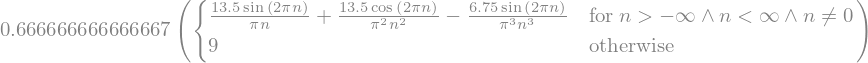

In [24]:
from sympy import cos
n=sym.symbols('n')

sym.integrate(x**2*cos(2.0*n*pi*x/3.0), (x, 0, 3))

$$b_n=\frac{2}{3}\int_0^3x^2\sin\Big(\frac{2n\pi x}{3}\Big)=-\frac{9}{n\pi}$$

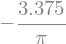

In [59]:
from sympy import sin
sym.integrate(x**2*sin(2.0*n*pi*x/3.0), (x, 0, 3))

Así la serie de Fourier esta expresada por 
$$3+\sum_{n=1}^\infty\frac{9}{n\pi}\Big(\frac{1}{n\pi}\cos\Big(\frac{2n\pi x}{3}\Big)-\sin\Big(\frac{2n\pi x}{3}\Big)\Big).$$



Ahora podemos calcular los términos $$c_n=\sqrt{a_n^2+b_n^2}=\frac{9}{n^2\pi^2}\sqrt{1+\pi^2n^2},$$
y 
$$\delta_n=\arctan\Big(-\frac{b_n}{a_n}\Big)=\arctan\Big(-\frac{-9/(n\pi)}{9/(n^2\pi^2)}\Big)=\arctan(n\pi),=0$$
Así 

$$3+\sum_{n=1}^\infty\frac{9}{n^2\pi^2}\sqrt{1+\pi^2n^2}\cos\Big(\frac{2n\pi x}{3}\Big).$$

### Ejercicio 
* Encuentre a que función converge en el intervalo $[-3/2,3/2]$
* Interprete los resultados de la siguiente gráfico ($c_n/2$ vs $\omega_n$) 

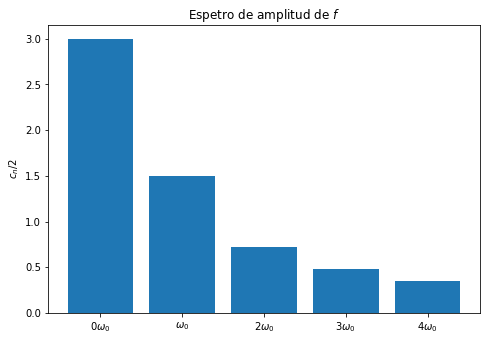

In [58]:
import matplotlib.pyplot as plt
import numpy as np
omega=[3,0,0,0,0]
for n in range(1,5):
    omega[n]=(9/(n**2*np.pi**2))*(np.sqrt(1+n**2*np.pi**2))*0.5
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['$0\omega_0$', '$\omega_0$', '$2\omega_0$', '$3\omega_0$', '$4\omega_0$']
omega = [3,1.5,0.72,0.48,0.35]
ax.bar(langs,omega)
plt.ylabel('$c_n/2$')
plt.title('Espetro de amplitud de $f$ ')
plt.show()

Note que si usamos $\omega_0$ tenemos que la transformada de Fourier en términos de complejos tenemos de $f$ en $[-L,L]$

$$\sum_{n=-\infty}^\infty d_ce^{in\omega_0 x}$$

donde $$d_n=\frac{1}{2L}\int_{-L}^Lf(x)e^{-iw_0 x}dx$$
para $n=\pm 1,\pm 2,\dots$




# Ejercicios 
Encuentre el angulo fase de la serie de Fourier en su forma armónica, grafiqué algunos puntos del espectro de la amplitud 

1. Sea $f(x)=x$ para $0<\leq x <2$, con un periodo fundamental de 2.
2. Sea $f(x)=\begin{cases}1+x& \text{ para }0\leq x<3\\
2& \text{ para }2\leq x<4
\end{cases}$, con $f$ un periodo fundamental de 4.
3.  Sea $f(x)=\cos(\pi x)$ para $0<\leq x <2$, con un periodo fundamental de 1.

[Aquí puedes encontrar más aplicaciones del cálculo de la serie de Fourier usando sympy](https://docs.sympy.org/latest/modules/series/fourier.html)


# Aplicación de la serie de Fourier




In [55]:
Transformada de Fourier

TFF